# 스터디카페의 EDA 

## 데이터 내용

- entry_data : 스터디카페의 시간별 입장 기록 데이터
- sales_data : 스터디카페의 시간별 음식/음료 판매 데이터
- item_data : 스터디카페에서 판매하고 있는 음식/음료 종류와 가격
- item_entry_data : 스터디카페에서 판매하는 입장권 종류와 가격

## 꼭 포함될 내용

- 월별 매출액 추세
  
  
- 가장 인기있는 음식 / 음료
  
  
- 가장 많이 팔린 입장권 종류

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from os.path import join
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/Arial.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
entry_data = pd.read_csv('./data/entry_data.csv')
sales_data = pd.read_csv('./data/sales_data.csv')
entry_item_data = pd.read_csv('./data/item_entry_data.csv')
item_data = pd.read_csv('./data/item_data.csv')

In [4]:
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [5]:
sales_data.loc[0:10]

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507
5,2022-04-01 16:32,선불기1,라면,신용카드,결제완료,1,"4,000",customer977070
6,2022-04-01 16:32,선불기1,소떡소떡,신용카드,결제완료,1,"3,000",customer977070
7,2022-04-01 15:19,선불기1,아이스티,신용카드,결제완료,1,"3,900",customer630809
8,2022-04-01 13:01,선불기1,순살닭다리덮밥,신용카드,결제완료,1,"8,000",customer255068
9,2022-04-01 13:01,선불기1,만두라면,신용카드,결제완료,1,"5,000",customer255068


In [6]:
entry_item_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


In [7]:
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [8]:
sales_var = sales_data[['결제일시','결제금액']]

In [9]:
sales_var.head()

,결제일시,결제금액
0,2022-04-01 19:41,"4,500"
1,2022-04-01 19:41,"5,500"
2,2022-04-01 19:41,"4,000"
3,2022-04-01 19:41,"1,000"
4,2022-04-01 19:41,"5,000"


In [10]:
sales_var.dtypes

결제일시    object
결제금액    object
dtype: object

In [11]:
sales_var['date'] = sales_data['결제일시'].apply(lambda i:i[:7]).astype(str)

In [12]:
sales_var

,결제일시,결제금액,date
0,2022-04-01 19:41,"4,500",2022-04
1,2022-04-01 19:41,"5,500",2022-04
2,2022-04-01 19:41,"4,000",2022-04
3,2022-04-01 19:41,"1,000",2022-04
4,2022-04-01 19:41,"5,000",2022-04
...,...,...,...
7100,2021-02-17 14:21,"-3,500",2021-02
7101,2021-02-17 13:51,"4,500",2021-02
7102,2021-02-17 13:51,"-4,500",2021-02
7103,2021-02-17 13:26,"4,000",2021-02


In [13]:
sales_var['payment'] = sales_var['결제금액'].apply(lambda i:i.replace(",", "")).astype(int)

In [14]:
sales_var.dtypes

결제일시       object
결제금액       object
date       object
payment     int32
dtype: object

In [15]:
del sales_var['결제금액']
del sales_var['결제일시']

In [16]:
sales_var.head()

,date,payment
0,2022-04,4500
1,2022-04,5500
2,2022-04,4000
3,2022-04,1000
4,2022-04,5000


In [17]:
grouped = pd.DataFrame(sales_var['payment'].groupby(sales_var['date']).sum())
grouped = grouped.reset_index()
grouped

,date,payment
0,2021-02,7000
1,2021-03,2104500
2,2021-04,3116600
3,2021-05,2537000
4,2021-06,3621500
5,2021-07,1215000
6,2021-08,1229000
7,2021-09,1197500
8,2021-10,2138500
9,2021-11,2748500


In [18]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     15 non-null     object
 1   payment  15 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 308.0+ bytes


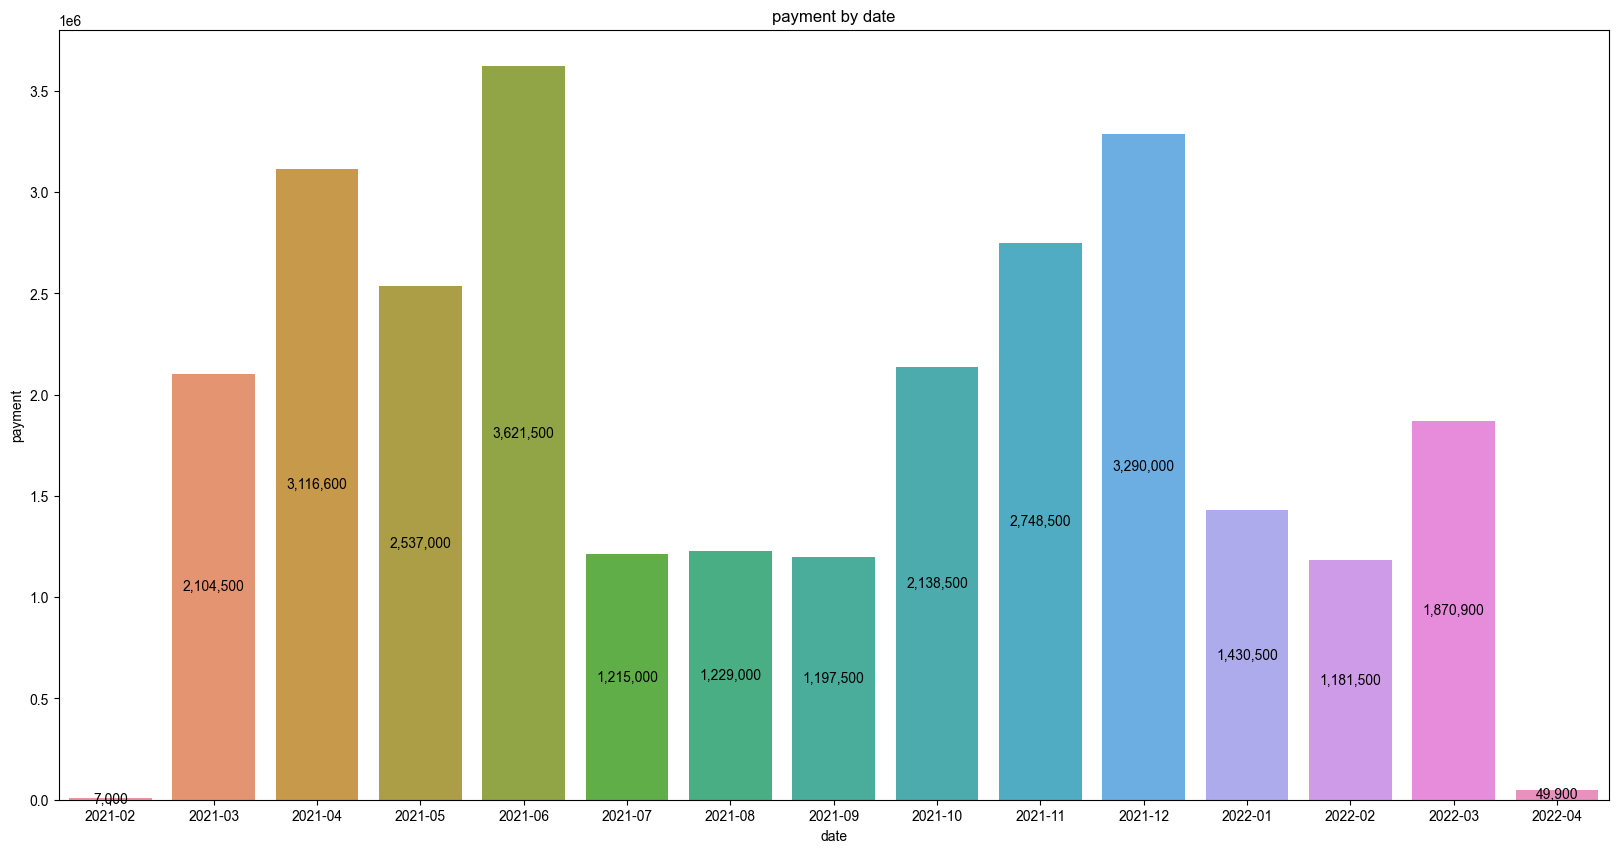

In [19]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data = grouped, x='date', y='payment')

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('payment by date')

plt.show()

## 가장 인기있는 음료/음식 10개 시각화

In [20]:
sales_data

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507
...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN


In [21]:
sales_top10 = sales_data['상품명'].value_counts()

In [22]:
sales_top10 = sales_top10[:10]

In [23]:
sales_top10 = pd.DataFrame(sales_top10)

In [24]:
sales_top10 = sales_top10.reset_index()
sales_top10

,index,상품명
0,김치볶음밥,1211
1,라면,756
2,짜장라면,457
3,치즈불고기볶음밥,423
4,계란추가,315
5,아메리카노(ICE),314
6,낙지볶음밥,314
7,새우볶음밥,311
8,치즈감자튀김,247
9,감자튀김,242


In [25]:
sales_top10.columns= ['상품명','판매수량']

In [26]:
sales_top10

,상품명,판매수량
0,김치볶음밥,1211
1,라면,756
2,짜장라면,457
3,치즈불고기볶음밥,423
4,계란추가,315
5,아메리카노(ICE),314
6,낙지볶음밥,314
7,새우볶음밥,311
8,치즈감자튀김,247
9,감자튀김,242


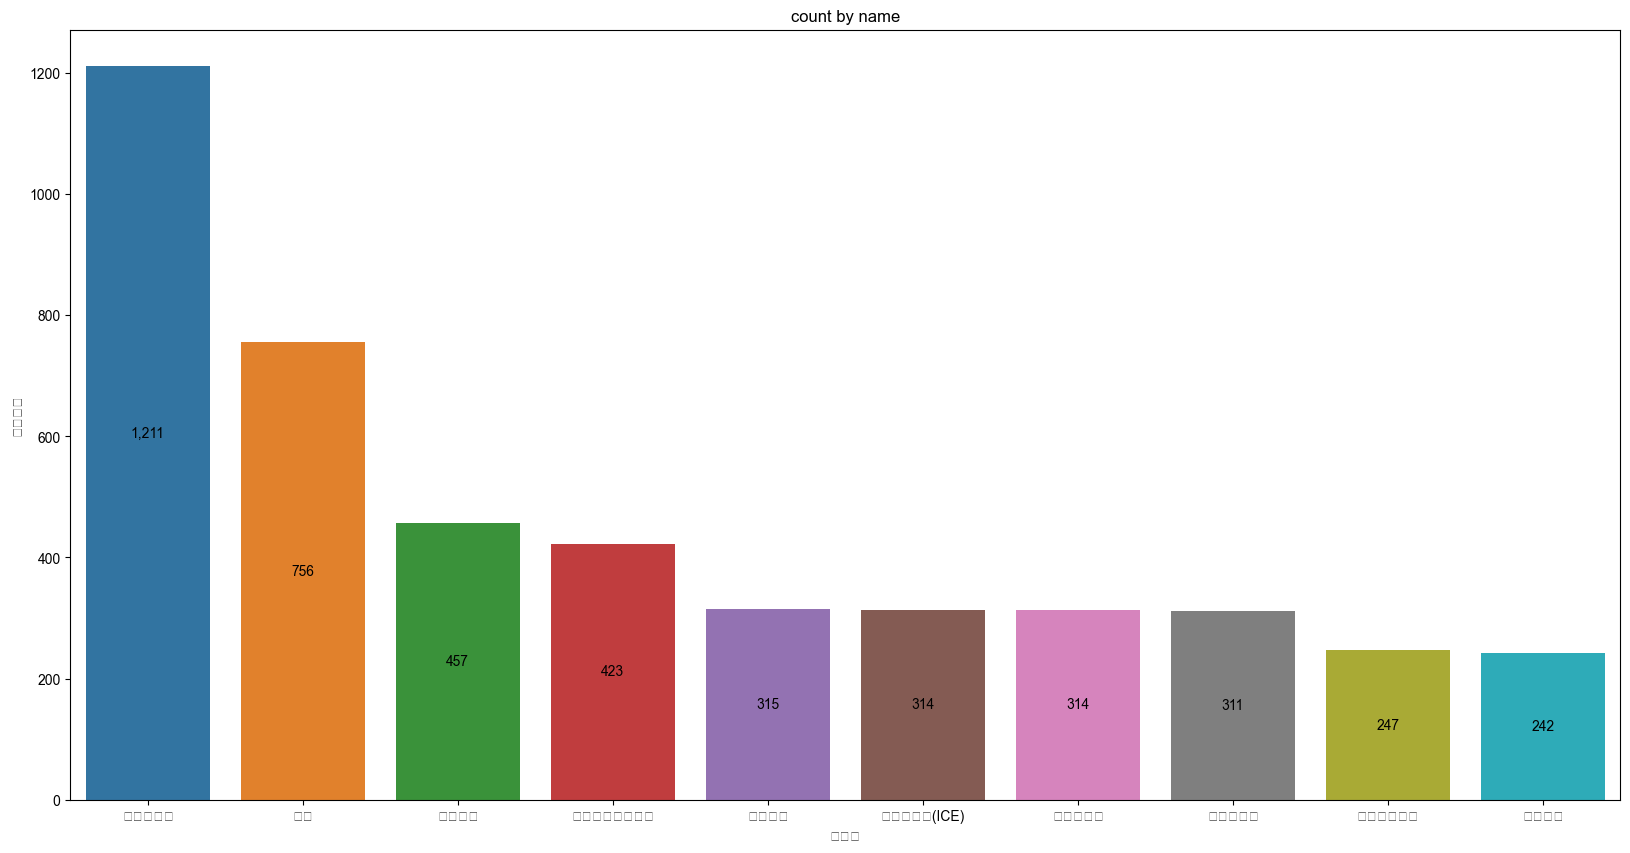

In [27]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data = sales_top10, x='상품명', y='판매수량')

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('count by name')

plt.show()

In [28]:
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [29]:
sales_pay = sales_data.copy()

In [30]:
sales_pay['payment'] = sales_pay['결제금액'].apply(lambda i:i.replace(",", "")).astype(int)
del sales_pay['결제금액']
sales_pay.dtypes

결제일시       object
판매위치       object
상품명        object
결제방식       object
비고         object
판매수량        int64
고객         object
payment     int32
dtype: object

In [31]:
sales_pay = sales_pay['payment'].groupby(sales_pay['상품명']).sum()

In [32]:
sales_pay = sales_pay.sort_values(ascending=False)

In [33]:
sales_pay_top10 = sales_pay[:10]

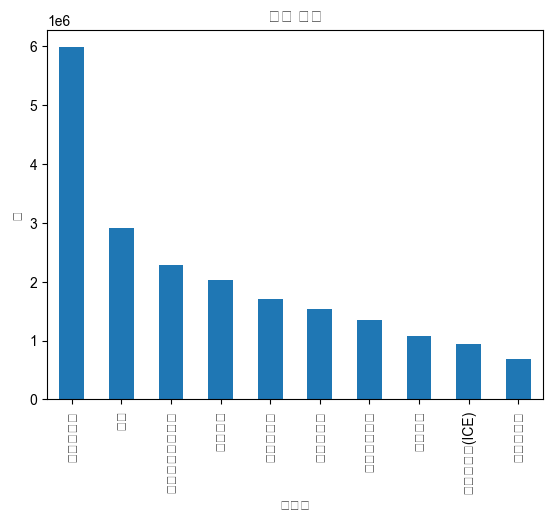

In [34]:
sales_pay_top10.plot(kind='bar')
plt.ylabel('원')
plt.title('판매 금액')
plt.show()

## 가장 많이 팔린 입장권 종류
- 여러 입장권 종류를 판매 매출(판매 개수 x 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
- 힌트: value_counts() 함수를 사용하세요.

In [35]:
ei_data = entry_data.copy()
ei_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [37]:
ei_pay = ei_data['금액'].groupby(ei_data['요금제명']).sum()

In [38]:
ei_top10 = ei_pay.sort_values(ascending=False)[:10]

In [40]:
ei_top10

요금제명
한국대생 입장권(종일권)      70037000
입장권(종일권)           23570500
심야-조조무제한(06시까지)    11600000
심야-조조무제한            6221000
한국대생 무제한 입장권        5207500
시간요금제(1시간)          2665500
시간요금제(3시간)          2042000
무제한 입장권             1568600
18시이후 무제한           1330500
조조무제한                693000
Name: 금액, dtype: int64

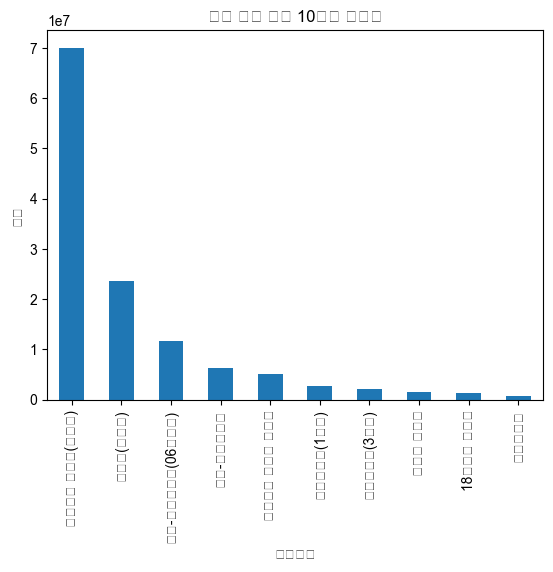

In [39]:
ei_top10.plot(kind='bar')
plt.ylabel('금액')
plt.title('가장 많이 팔린 10가지 요금제')
plt.show()

## 이용 시간대를 고려한 운영

In [41]:
time_data = entry_data.copy()

In [42]:
time_data

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


In [59]:
time_data['입실'].apply(lambda x:x[11:13])

0        23
1        23
2        20
3        20
4        19
         ..
22550    13
22551    13
22552    13
22553    13
22554    12
Name: 입실, Length: 22555, dtype: object

In [100]:
time_data['entry'] = time_data['입실'].apply(lambda x:x[11:13])
time_data['exit'] = time_data['퇴실'].apply(lambda x:x[11:13])

In [101]:
x = time_data['entry'], time_data['exit']

In [102]:
x = pd.DataFrame(x)

In [103]:
t_data = x.T

In [104]:
t_data['entry'] = t_data['entry'].replace('0:', '00')
t_data['exit'] = t_data['exit'].replace('0:', '00')
t_data['entry'] = t_data['entry'].replace('1:', '01')
t_data['exit'] = t_data['exit'].replace('1:', '01')
t_data['entry'] = t_data['entry'].replace('2:', '02')
t_data['exit'] = t_data['exit'].replace('2:', '02')
t_data['entry'] = t_data['entry'].replace('3:', '03')
t_data['exit'] = t_data['exit'].replace('3:', '03')
t_data['entry'] = t_data['entry'].replace('4:', '04')
t_data['exit'] = t_data['exit'].replace('4:', '04')
t_data['entry'] = t_data['entry'].replace('5:', '05')
t_data['exit'] = t_data['exit'].replace('5:', '05')
t_data['entry'] = t_data['entry'].replace('6:', '06')
t_data['exit'] = t_data['exit'].replace('6:', '06')
t_data['entry'] = t_data['entry'].replace('7:', '07')
t_data['exit'] = t_data['exit'].replace('7:', '07')
t_data['entry'] = t_data['entry'].replace('8:', '08')
t_data['exit'] = t_data['exit'].replace('8:', '08')
t_data['entry'] = t_data['entry'].replace('9:', '09')
t_data['exit'] = t_data['exit'].replace('9:', '09')

In [105]:
t_data.head()

,entry,exit
0,23,00
1,23,00
2,20,21
3,20,21
4,19,22


In [133]:
t_data['entry'] = t_data['entry'].astype(int)
t_data['exit'] = t_data['exit'].astype(int)

In [137]:
t_data['staytime'] = t_data['exit'] - t_data['entry']

In [140]:
entry_top10 = t_data.entry.value_counts()[:10]

In [116]:
exit_top10 = t_data.exit.value_counts()[:10]

In [158]:
stay_top10 = t_data['staytime'].value_counts()[:10]

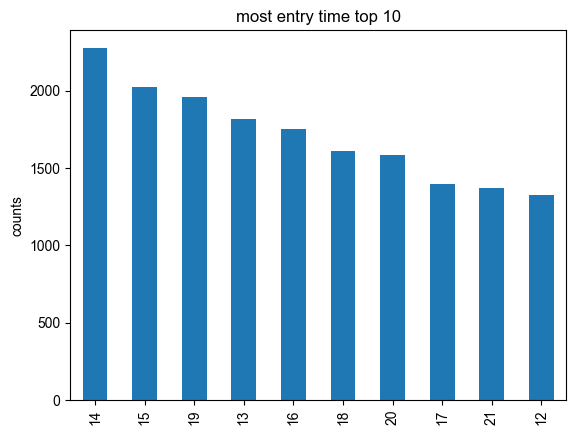

In [160]:
entry_top10.plot(kind='bar')
plt.ylabel('counts')
plt.title('most entry time top 10')
plt.show()

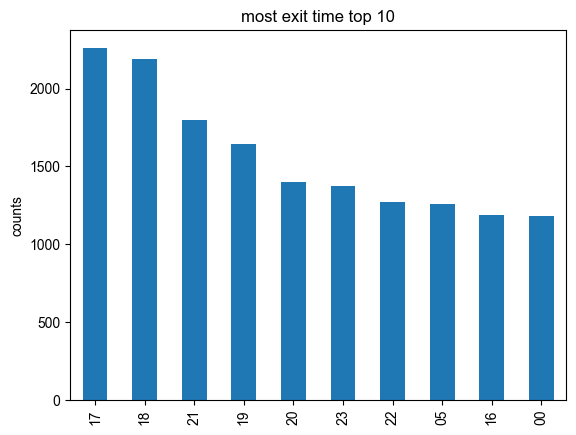

In [161]:
exit_top10.plot(kind='bar')
plt.ylabel('counts')
plt.title('most exit time top 10')
plt.show()

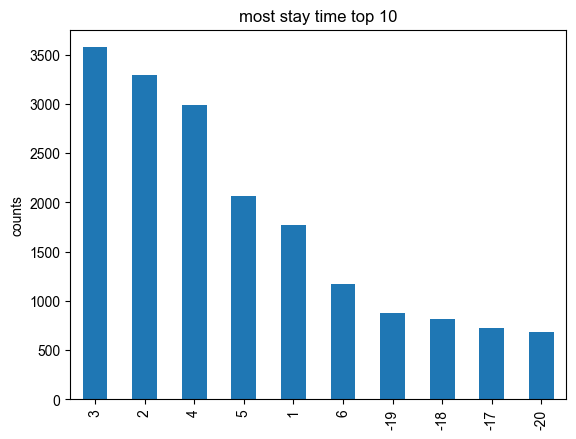

In [162]:
stay_top10.plot(kind='bar') # - 인 값은 오후 늦게 시작해서 새벽 일찍 끝난 사람들 ex) start : 22시 , end : 02시 -> -20
plt.ylabel('counts')
plt.title('most stay time top 10')
plt.show()

- 위의 그래프로 보았을때 
> - 가장 많이 이용하는 시간은 오후 1시부터 오후 9시 사이
> - 가장 많이 퇴장하는 시간은 오후 5시부터 오후 11시 사이
> - 가장 많이 이용하는 시간대는 3 ~ 5시간을 많이 이용하는것으로 보인다.
> - 이러한 자료로 추측해 보았을 때 가장 유동인구가 많은 시간대인 오후 1시부터 오후 11시 사이에만 이용할 수 있는 특정 이용권을 채용하여 사용하고
> - 음식 종류의 다양성을 더 늘려야 할것으로 보인다.